In [1]:
from cmath import log
import uproot as up
import awkward as ak
import coffea
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema, TreeMakerSchema
from coffea.nanoevents.methods import candidate
ak.behavior.update(candidate.behavior)
from template.temp_class import ntuplize
import numpy as np
import argparse
import os
import yaml

In [2]:
def list_concatenate(list1,list2):
    new_list = []
    for a in list1:
        new_list.append(a)
    for b in list2:
        new_list.append(b)
    return new_list

Create type 1 hist_plot named "mll".
Create type 1 hist_plot named "mjj".

WZTo3LNu_0Jets_MLL_4to50 no signal events


WZTo3LNu_0Jets_MLL_4to50 no non_prompt events


WZTo3LNu_0Jets_MLL_4to50 no wrong_sign events


WZTo3LNu_1Jets_MLL_4to50 no non_prompt events


ggWW_ee no non_prompt events


ggWW_em no non_prompt events


ggWW_et no signal events


ggWW_et no non_prompt events


ggWW_me no signal events


ggWW_me no non_prompt events


ggWW_mm no signal events


ggWW_mm no non_prompt events


ggWW_mt no signal events


ggWW_mt no non_prompt events


ggWW_te no signal events


ggWW_te no non_prompt events


ggWW_tm no signal events


ggWW_tm no non_prompt events


ggWW_tt no signal events


ggWW_tt no non_prompt events


DYJets_M10to50 no signal events


DYJets_M10to50 no non_prompt events


ggh_ww no signal events


ggh_ww no non_prompt events


VBFHToWWTo2L2Nu no signal events


WWW no non_prompt events


ZZZ no non_prompt events

Histplot:mll	No label named "$W^\pm W^\pm$"
Histplot:

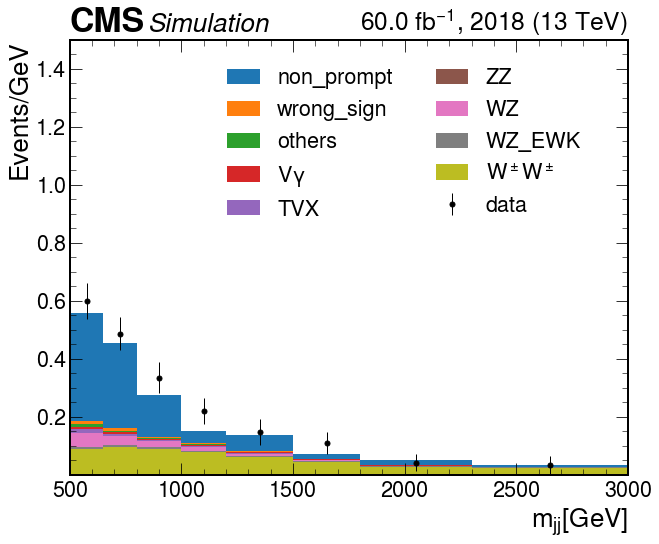

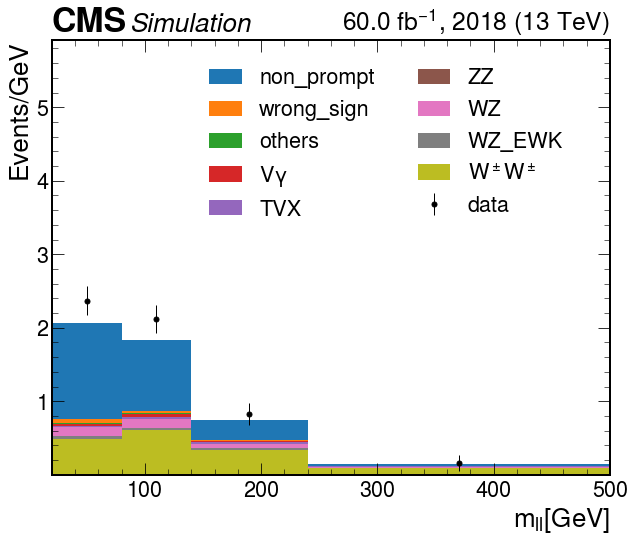

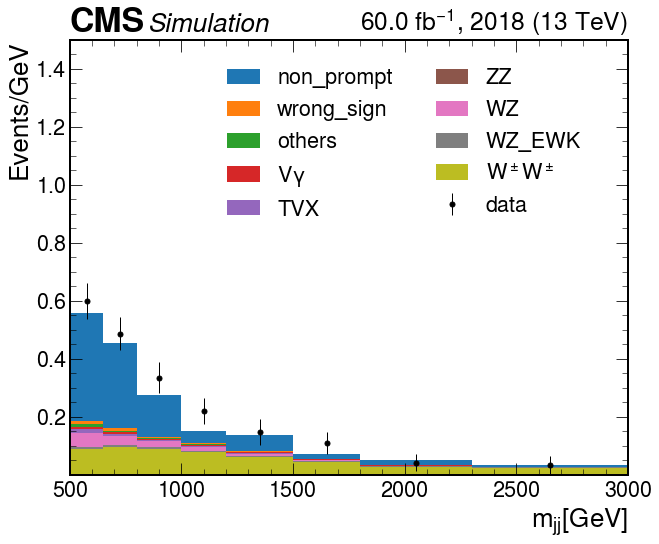

In [3]:
from yty_hist_class import yty_histplot

nanov7_dir = r'/data/pubfs/pku_visitor/public_write/download/datasets/nanov7'
with open(f"/data/pubfs/tyyang99/jupyter_files/changexs_datasets.yaml", 'r') as f:
    mc_yaml = yaml.load(f, Loader=yaml.FullLoader)
with open(f"/data/pubfs/tyyang99/jupyter_files/data_2018_nanov7.yaml", 'r') as f:
    data_yaml = yaml.load(f, Loader=yaml.FullLoader)

lepton_type = 'all'#['2e','2mu','1e1mu','all']

Lumi = 60.0*1e3
year='2018'

default_mll_histbins = [20., 80., 140., 240., 500]
default_mjj_histbins = [500., 650., 800., 1000., 1200., 1500., 1800., 2300., 3000.]
# default_mjj_histbins = [500., 800., 1200., 1800., 3000.]

mll_hist = yty_histplot('mll',1,default_mll_histbins,Figsize=(10,8))
mjj_hist = yty_histplot('mjj',1,default_mjj_histbins,Figsize=(10,8))

divide_processes_label_list = []
processes_label_list = []
nonprompt_label_list_data = []
nonprompt_label_list_mc = []

for isdata in ['mc','data']:
# for isdata in ['data']:
    buffer_out_range_list = []
    if isdata=='data':
        Data_merge = [
                     'DoubleMuon_Run2018A','DoubleMuon_Run2018B','DoubleMuon_Run2018C','DoubleMuon_Run2018D',
                     'EGamma_Run2018A','EGamma_Run2018B','EGamma_Run2018C','EGamma_Run2018D',
                     'SingleMuon_Run2018A','SingleMuon_Run2018B','SingleMuon_Run2018C','SingleMuon_Run2018D',
                     'MuonEG_Run2018A','MuonEG_Run2018B','MuonEG_Run2018C','MuonEG_Run2018D'
                     ]
    #     PROCESSES = [[i] for i in Data_merge]
    #     legendlist = Data_merge
        PROCESSES = [Data_merge]
        legendlist = ['data']
    elif isdata=='mc':
        WW_merge = ['WpWpJJ_EWK', 'WpWpJJ_QCD']
        WZ_EWK = ['WLLJJ_EWK']
        WZ_merge = ['WZTo3LNu_0Jets_MLL_4to50','WZTo3LNu_1Jets_MLL_4to50','WZTo3LNu_2Jets_MLL_4to50','WZTo3LNu_3Jets_MLL_4to50',
                   'WZTo3LNu_0Jets_MLL_50','WZTo3LNu_1Jets_MLL_50','WZTo3LNu_2Jets_MLL_50','WZTo3LNu_3Jets_MLL_50']
        ZZ_merge = ['ZZJJTo4L_EWK','ZZJJTo4L_QCD','ZZJJTo4L_int','ggZZ_2e2mu',
                   'ggZZ_2e2tau','ggZZ_2mu2tau','ggZZ_4e','ggZZ_4mu','ggZZ_4tau','ggZZ_4tau_ext']
        TVX_merge = ['TTGJets','TTZToQQ','TTZToQQ_ext','TTZToLLNuNu_M_10',
                     'TTWJetsToQQ','TTWJetsToLNu','tZq']
        VG_merge = ['Zgamma_EWK','Zgamma_EWK_ext','Wgamma_EWK','Wgamma_int']
        WS_merge = ['WWTo2L2Nu',
                    'ggWW_ee','ggWW_em','ggWW_et','ggWW_me','ggWW_mm','ggWW_mt','ggWW_te','ggWW_tm','ggWW_tt',
                    'TTTo2L2Nu','ST_tW_top','ST_tW_antitop',
                    'DYJetsToLL_M50','DYJets_M10to50','DYJets_M10to50_ext','ggh_ww','ggh_zz','ggh_tautau',
                    'VBF_HToZZTo4L','VBFHToWWTo2L2Nu','VBFHToTauTau',
                    'ttHToNonbb','VHToNonbb']
        Other_merge = ['WW_DS','WWW','WWZ','WZZ','ZZZ','WWG']

        PROCESSES = [WW_merge, WZ_EWK, WZ_merge, ZZ_merge, TVX_merge, VG_merge, WS_merge, Other_merge]
    # PROCESSES = [WW_merge, WZ_EWK]
        legendlist = ['$W^\pm W^\pm$', 'WZ_EWK', 'WZ', 'ZZ', 'TVX', '$V\gamma$','ws_sample', 'others']
    else:
        pass
    # test_merge = [[i] for i in Data_merge]
    # legendlist = [i for i in Data_merge]

    wrong_sign_label_list = []

    _2e_label_list = []
    _2mu_label_list = []
    _1e1mu_label_list = []

    # store_folder = f"{isdata}_ssww_final_output_array"
#     store_folder = f"coffea_DeepCSVbtag_newHLT_{isdata}_MET_ssww_final_output_array"
    store_folder = f"coffea_correctjet_newHLT_{isdata}_MET_ssww_final_output_array"
    # for i,process_list in enumerate(test_merge):
    for i,process_list in enumerate(PROCESSES):
        legend = legendlist[i]

        temp_nonprompt_label_list = []
        temp_wrong_sign_label_list = []
        temp_processes_label_list = []

        temp_2e_label_list = []
        temp_2mu_label_list = []
        temp_1e1mu_label_list = []

        for process in process_list:

            if process.endswith('_ext'):
                continue
    #         else:
    #             print(process)
    #             process_dir = 'ssww_events_new/'+process
    #             if isdata==True:
    #                 pass
    #             else:
    #                 xs = mc_yaml[process]['xs']
    #             nevents = 0
    #             parquet_list = []

    #             if process+'_ext' in process_list:
    #                 process_ext_dir = 'ssww_events_new/'+process+'_ext'
    #                 for parq_ext_file in os.listdir(process_ext_dir):
    #                     parquet_list.append(process_ext_dir+'/'+parq_ext_file)
    #             else:
    #                 pass

    #             for parq_file in os.listdir(process_dir):
    #                 parquet_list.append(process_dir+'/'+parq_file)

    #             for n_par, parquet_file in enumerate(parquet_list):
    #                 parquet_dir = parquet_file
    #                 print(parquet_dir,'\t%d/%d'%(n_par+1,len(parquet_list)))

    #                 events = NanoEventsFactory.from_parquet(parquet_dir, schemaclass=NanoAODSchema).events()

    #                 try:
    #                     nevents += events.nevents[0]
    #                 except:
    #                     print('buffer outrange!')
    #                     buffer_out_range_list.append(parquet_dir)
    #                     continue

    #         if isdata==True:
    #             mc_weight = 1
    #         else:
    #             mc_weight = Lumi*xs/nevents
    #         print(f"{process} %d"%nevents)
            try:
                if isdata=='data':
                    mll_array_list = ak.from_parquet(f"{store_folder}/mll_{process}.parquet")
                    mll_array_list = mll_array_list*(mll_array_list<default_mll_histbins[-1])+(default_mll_histbins[-1]+default_mll_histbins[-2])/2*(mll_array_list>=default_mll_histbins[-1])
                    mjj_array_list = ak.from_parquet(f"{store_folder}/mjj_{process}.parquet")
                    mjj_array_list = mjj_array_list*(mjj_array_list<default_mjj_histbins[-1])+(default_mjj_histbins[-1]+default_mjj_histbins[-2])/2*(mjj_array_list>=default_mjj_histbins[-1])
                    mjj_array_list = mjj_array_list*(mjj_array_list>default_mjj_histbins[0])+(default_mjj_histbins[1]+default_mjj_histbins[0])/2*(mjj_array_list<=default_mjj_histbins[0])
                else:
                    mll_array_list = ak.from_parquet(f"{store_folder}/mll_{process}.parquet")
                    mll_array_list = mll_array_list*(mll_array_list<default_mll_histbins[-1])+(default_mll_histbins[-1]+default_mll_histbins[-2])/2*(mll_array_list>=default_mll_histbins[-1])
                    mll_weight_list = ak.from_parquet(f"{store_folder}/mll_weight_{process}.parquet")
                    mjj_array_list = ak.from_parquet(f"{store_folder}/mjj_{process}.parquet")
                    mjj_array_list = mjj_array_list*(mjj_array_list<default_mjj_histbins[-1])+(default_mjj_histbins[-1]+default_mjj_histbins[-2])/2*(mjj_array_list>=default_mjj_histbins[-1])
                    mjj_array_list = mjj_array_list*(mjj_array_list>default_mjj_histbins[0])+(default_mjj_histbins[1]+default_mjj_histbins[0])/2*(mjj_array_list<=default_mjj_histbins[0])
                    mjj_weight_list = ak.from_parquet(f"{store_folder}/mjj_weight_{process}.parquet")
                    
                if lepton_type in ['2e','2mu','1e1mu']:
                    tight_2l_sel = ak.from_parquet(f"{store_folder}/ss_{lepton_type}_{process}.parquet")==1
                else:
                    tight_2l_sel = ak.ones_like(mll_array_list)==1
                    
                mll_array_list = mll_array_list[tight_2l_sel]
                mjj_array_list = mjj_array_list[tight_2l_sel]
                
                mll_hist.append_values(process,[mll_array_list])
                if isdata=='mc':
                    mll_weight_list = mll_weight_list[tight_2l_sel]
                    mll_hist.append_weights(process,[mll_weight_list])
                mjj_hist.append_values(process,[mjj_array_list])
                if isdata=='mc':
                    mjj_weight_list = mjj_weight_list[tight_2l_sel]
                    mjj_hist.append_weights(process,[mjj_weight_list])
                    

                temp_processes_label_list.append(process)
            except:
                print(f"\n{process} no signal events\n")

            try:
                temp_nonprompt_mll_array_list = ak.from_parquet(f"{store_folder}/mll_{process}_nonprompt.parquet")
                temp_nonprompt_mll_weight_list = ak.from_parquet(f"{store_folder}/mll_weight_{process}_nonprompt.parquet")
                temp_nonprompt_mjj_array_list = ak.from_parquet(f"{store_folder}/mjj_{process}_nonprompt.parquet")
                temp_nonprompt_mjj_array_list = temp_nonprompt_mjj_array_list*(temp_nonprompt_mjj_array_list<default_mjj_histbins[-1])+(default_mjj_histbins[-1]+default_mjj_histbins[-2])/2*(temp_nonprompt_mjj_array_list>=default_mjj_histbins[-1])
                temp_nonprompt_mjj_array_list = temp_nonprompt_mjj_array_list*(temp_nonprompt_mjj_array_list>default_mjj_histbins[0])+(default_mjj_histbins[1]+default_mjj_histbins[0])/2*(temp_nonprompt_mjj_array_list<=default_mjj_histbins[0])
                temp_nonprompt_mjj_weight_list = ak.from_parquet(f"{store_folder}/mjj_weight_{process}_nonprompt.parquet")
                
                if lepton_type in ['2e','2mu','1e1mu']:
                    nonprompt_2l_sel = ak.from_parquet(f"{store_folder}/ss_{lepton_type}_nonprompt_{process}.parquet")==1
                else:
                    nonprompt_2l_sel = ak.ones_like(temp_nonprompt_mll_array_list)==1
                #########
                temp_nonprompt_mll_array_list = temp_nonprompt_mll_array_list[nonprompt_2l_sel]
                temp_nonprompt_mll_weight_list = temp_nonprompt_mll_weight_list[nonprompt_2l_sel]
                temp_nonprompt_mjj_array_list = temp_nonprompt_mjj_array_list[nonprompt_2l_sel]
                temp_nonprompt_mjj_weight_list = temp_nonprompt_mjj_weight_list[nonprompt_2l_sel]
                
                #########

                mll_hist.append_values(process+'_nonprompt',[temp_nonprompt_mll_array_list])
                mll_hist.append_weights(process+'_nonprompt',[temp_nonprompt_mll_weight_list])
                mjj_hist.append_values(process+'_nonprompt',[temp_nonprompt_mjj_array_list])
                mjj_hist.append_weights(process+'_nonprompt',[temp_nonprompt_mjj_weight_list])
                

                temp_nonprompt_label_list.append(process+'_nonprompt')
                if isdata=='data':
                    nonprompt_label_list_data.append(process+'_nonprompt')
                else:
                    nonprompt_label_list_mc.append(process+'_nonprompt')
            except:
                print(f"\n{process} no non_prompt events\n")

            try:
                temp_wrong_sign_mll_array_list = ak.from_parquet(f"{store_folder}/mll_{process}_wrong_sign.parquet")
                temp_wrong_sign_mll_weight_list = ak.from_parquet(f"{store_folder}/mll_weight_{process}_wrong_sign.parquet")
                temp_wrong_sign_mjj_array_list = ak.from_parquet(f"{store_folder}/mjj_{process}_wrong_sign.parquet")
                temp_wrong_sign_mjj_weight_list = ak.from_parquet(f"{store_folder}/mjj_weight_{process}_wrong_sign.parquet")
                temp_wrong_sign_mjj_array_list = temp_wrong_sign_mjj_array_list*(temp_wrong_sign_mjj_array_list<default_mjj_histbins[-1])+(default_mjj_histbins[-1]+default_mjj_histbins[-2])/2*(temp_wrong_sign_mjj_array_list>=default_mjj_histbins[-1])
                temp_wrong_sign_mjj_array_list = temp_wrong_sign_mjj_array_list*(temp_wrong_sign_mjj_array_list>default_mjj_histbins[0])+(default_mjj_histbins[1]+default_mjj_histbins[0])/2*(temp_wrong_sign_mjj_array_list<=default_mjj_histbins[0])
                
                if lepton_type in ['2e','2mu','1e1mu']:
                    os_tight_2l_sel = ak.from_parquet(f"{store_folder}/os_{lepton_type}_{process}.parquet")==1
                else:
                    os_tight_2l_sel = ak.ones_like(temp_wrong_sign_mll_array_list)==1
                #########
                temp_wrong_sign_mll_array_list = temp_wrong_sign_mll_array_list[os_tight_2l_sel]
                temp_wrong_sign_mll_weight_list = temp_wrong_sign_mll_weight_list[os_tight_2l_sel]
                temp_wrong_sign_mjj_array_list = temp_wrong_sign_mjj_array_list[os_tight_2l_sel]
                temp_wrong_sign_mjj_weight_list = temp_wrong_sign_mjj_weight_list[os_tight_2l_sel]
                
                #########

                mll_hist.append_values(process+'_wrongsign',[temp_wrong_sign_mll_array_list])
                mll_hist.append_weights(process+'_wrongsign',[temp_wrong_sign_mll_weight_list])
                mjj_hist.append_values(process+'_wrongsign',[temp_wrong_sign_mjj_array_list])
                mjj_hist.append_weights(process+'_wrongsign',[temp_wrong_sign_mjj_weight_list])

                temp_wrong_sign_label_list.append(process+'_wrongsign')
                wrong_sign_label_list.append(process+'_wrongsign')

            except:
                print(f"\n{process} no wrong_sign events\n")
        if isdata=='mc':
            mll_hist.merge(temp_processes_label_list,[],legend)
            mjj_hist.merge(temp_processes_label_list,[],legend)
            
        else:
            mll_hist.merge(temp_processes_label_list,[],legend)
            mjj_hist.merge(temp_processes_label_list,[],legend)
#             mll_hist.merge(temp_processes_label_list,list_concatenate(temp_nonprompt_label_list,temp_wrong_sign_label_list),legend)
#             mjj_hist.merge(temp_processes_label_list,list_concatenate(temp_nonprompt_label_list,temp_wrong_sign_label_list),legend)
        if (not legend=='ws_sample') and isdata=='mc':
            processes_label_list.append(legend)
    #         processes_label_list.append(legend+'_wrongsign')

    mll_hist.merge(nonprompt_label_list_data,nonprompt_label_list_mc,'non_prompt')
    mjj_hist.merge(nonprompt_label_list_data,nonprompt_label_list_mc,'non_prompt')

    mll_hist.merge(wrong_sign_label_list,[],'wrong_sign')
    mjj_hist.merge(wrong_sign_label_list,[],'wrong_sign')

#     mll_hist.merge(ws_2e_label_list,[],'ws_2e')
#     mll_hist.merge(ws_2mu_label_list,[],'ws_2mu')
#     mll_hist.merge(ws_1e1mu_label_list,[],'ws_1e1mu')
    if isdata=='mc':
    #     processes_label_list.append('non_prompt')
        processes_label_list.append('wrong_sign')
    #     processes_label_list.append('ws_2e')
    #     processes_label_list.append('ws_2mu')
    #     processes_label_list.append('ws_1e1mu')
        pass
    else:
    #     pass
        processes_label_list.append('non_prompt')
    #     processes_label_list.append('ws_2e')
    #     processes_label_list.append('ws_2mu')
    #     processes_label_list.append('ws_1e1mu')
#         processes_label_list.append('wrong_sign')
        pass


mll_hist.set_legend(legendbool=True,ncol=2)
mll_hist.set_autoylim(2.5)
mll_hist.set_title(Lumi=60.0, Year=2018, xlabel='$m_{ll}[GeV]$', y1label='Events/GeV', title='',cmstitle=True)
mll_hist.draw(processes_label_list[:],histtype_list = ['fill']*len(processes_label_list[:]),stack=True)
mll_hist.draw('data',histtype_list = ['errorbar'],color_list = ['black'])
mjj_hist.set_legend(legendbool=True,ncol=2)
mjj_hist.set_autoylim(2.5)
mjj_hist.set_title(Lumi=60.0, Year=2018, xlabel='$m_{jj}[GeV]$', y1label='Events/GeV', title='',cmstitle=True)
mjj_hist.draw(processes_label_list[:],histtype_list = ['fill']*len(processes_label_list[:]),stack=True)
mjj_hist.draw('data',histtype_list = ['errorbar'],color_list = ['black'])



Histplot:mjj	No weights saved in label "DoubleMuon_Run2018A", use w=1 instead.
Histplot:mjj	No weights saved in label "DoubleMuon_Run2018B", use w=1 instead.
Histplot:mjj	No weights saved in label "DoubleMuon_Run2018C", use w=1 instead.
Histplot:mjj	No weights saved in label "DoubleMuon_Run2018D", use w=1 instead.
Histplot:mjj	No weights saved in label "EGamma_Run2018A", use w=1 instead.
Histplot:mjj	No weights saved in label "EGamma_Run2018B", use w=1 instead.
Histplot:mjj	No weights saved in label "EGamma_Run2018C", use w=1 instead.
Histplot:mjj	No weights saved in label "EGamma_Run2018D", use w=1 instead.
Histplot:mjj	No weights saved in label "SingleMuon_Run2018A", use w=1 instead.
Histplot:mjj	No weights saved in label "SingleMuon_Run2018B", use w=1 instead.
Histplot:mjj	No weights saved in label "SingleMuon_Run2018C", use w=1 instead.
Histplot:mjj	No weights saved in label "SingleMuon_Run2018D", use w=1 instead.
Histplot:mjj	No weights saved in label "MuonEG_Run2018A", use w=1 in

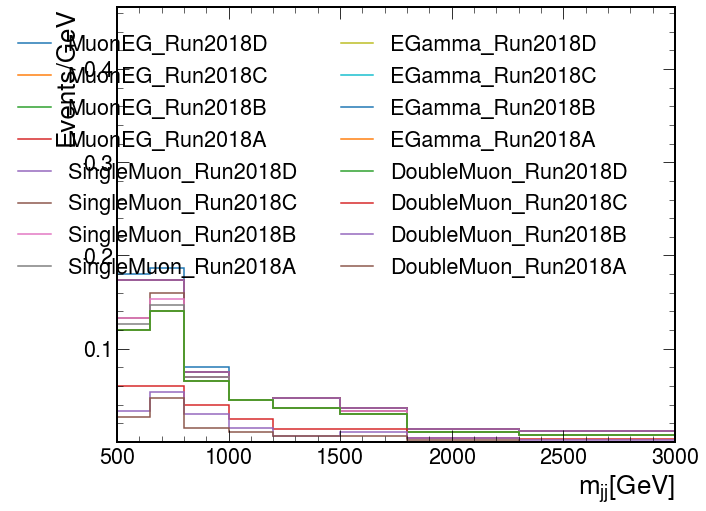

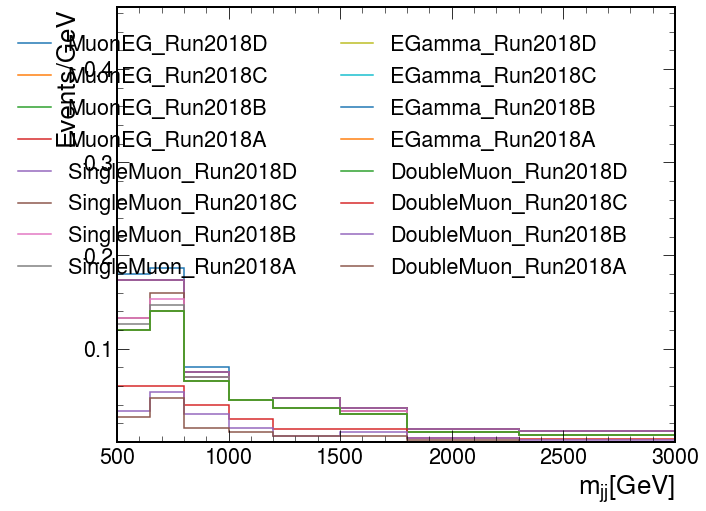

In [11]:
mjj_hist.draw(Data_merge,clear=True,stack=True)

In [14]:
# for key in Data_merge:
for key in mjj_hist.hists_dict.keys():
    if not key=='ws_sample':
#         content=mjj_hist.hists_dict[key].view().value
        [content,_]=mjj_hist.hists_dict[key]
        print(key,':\t',np.sum(content))

$W^\pm W^\pm$ :	 120.56607797025936
WZ_EWK :	 8.043433825660031
WZ :	 22.214757720008492
ZZ :	 0.44772048644244933
TVX :	 4.233955342089757
$V\gamma$ :	 6.591747586149722
others :	 3.181600765325129
non_prompt :	 147.18537810275637
wrong_sign :	 4.846781
data :	 370.0


In [5]:
temp_nonprompt_mjj_array_list

<Array [1.39e+03, 1.63e+03, ... 1.2e+03] type='112 * ?float64'>